# BPJS Health Facilities Analysis

### First, let import some important modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
%matplotlib inline

### Then, let's see what the data looks like

In [3]:
df = pd.read_csv("Data Faskes BPJS 2019.csv")
df

,NoLink,Provinsi,KotaKab,Link,TipeFaskes,No,KodeFaskes,NamaFaskes,LatLongFaskes,AlamatFaskes,TelpFaskes
0,0,Nanggroe Aceh Darussalam,Kode Faskes dan Alamat Rumah Sakit BPJS di Kot...,https://lovia.life/id/health/bpjs/area/kota-la...,Rumah Sakit,1,0001R001,RSU Cut Nyak Dhien\r\n \r\n...,"http://maps.google.co.id/?q=4.488058,97.947963",Jl. Tm Bahrum No. 1 Langsa,\r\n 0641-0621039\r\n
1,0,Nanggroe Aceh Darussalam,Kode Faskes dan Alamat Rumah Sakit BPJS di Kot...,https://lovia.life/id/health/bpjs/area/kota-la...,Rumah Sakit,2,0001R004,RSU Cut Meutia Langsa\r\n \...,"http://maps.google.co.id/?q=4.488088,97.947781",Jl.Garuda Kebun Baru Langsa,\r\n 0641- 4840076\r\n
2,0,Nanggroe Aceh Darussalam,Kode Faskes dan Alamat Rumah Sakit BPJS di Kot...,https://lovia.life/id/health/bpjs/area/kota-la...,Rumah Sakit,3,0105R001,RSUD Langsa\r\n \r\n ...,"http://maps.google.co.id/?q=4.472208,97.975533",Jln.A.Yani No. 1 Langsa,\r\n 0641-22051\r\n
3,0,Nanggroe Aceh Darussalam,Kode Faskes dan Alamat Rumah Sakit BPJS di Kot...,https://lovia.life/id/health/bpjs/area/kota-la...,Rumah Sakit,4,0105R013,RSU Ummi \r\n \r\n ...,"http://maps.google.co.id/?q=4.470376,97.991915",Jln. Prof. A. Madjid Ibrahim,\r\n 0641-22886\r\n
4,0,Nanggroe Aceh Darussalam,Kode Faskes dan Alamat Rumah Sakit BPJS di Kot...,https://lovia.life/id/health/bpjs/area/kota-la...,Puskesmas,1,00010001,Langsa Lama\r\n \r\n ...,"http://maps.google.co.id/?q=4.478172,97.949988",Gampong Meurandeh Dayah,\r\n 0641-064121218\r\n
...,...,...,...,...,...,...,...,...,...,...,...
29152,513,Kalimantan Utara,Kode Faskes dan Alamat Rumah Sakit BPJS di\r\n...,https://lovia.life/id/health/bpjs/area/kab-tan...,Dokter Praktik Perorangan,-,-,-,-,-,-
29153,513,Kalimantan Utara,Kode Faskes dan Alamat Rumah Sakit BPJS di\r\n...,https://lovia.life/id/health/bpjs/area/kab-tan...,Dokter Gigi,-,-,-,-,-,-
29154,513,Kalimantan Utara,Kode Faskes dan Alamat Rumah Sakit BPJS di\r\n...,https://lovia.life/id/health/bpjs/area/kab-tan...,Klinik Utama,-,-,-,-,-,-
29155,513,Kalimantan Utara,Kode Faskes dan Alamat Rumah Sakit BPJS di\r\n...,https://lovia.life/id/health/bpjs/area/kab-tan...,Klinik Pratama,1,0472B001,RSUD Akhmad Berahim \r\n \r...,-,Jl. Perintis Km I,\r\n 0813-86928242\r\n


### The data is consist of 29.157 rows and 11 columns

### Ensure whether  the data have empty values or not 

In [21]:
df[df.isnull()].count()

NoLink           0
Provinsi         0
KotaKab          0
Link             0
TipeFaskes       0
No               0
KodeFaskes       0
NamaFaskes       0
LatLongFaskes    0
AlamatFaskes     0
TelpFaskes       0
dtype: int64

### It's confirmed, There are no empty data in each column

In [4]:
# I'm clearing some whitespace in the data.
df['NamaFaskes'] = df['NamaFaskes'].map(lambda x: x.replace('\r\n', '').strip())
df['TelpFaskes'] = df['TelpFaskes'].map(lambda x: x.replace('\r\n', '').strip())

# Analyze the distribution of medical facilities

In [5]:
# Group the data according to Province
prov_count = df.groupby("Provinsi")["Provinsi"].count()
prov_count

Provinsi
Bali                         765
Banten                       913
Bengkulu                     390
D I Yogyakarta               534
Dki Jakarta                  995
Gorontalo                    206
Jambi                        446
Jawa Barat                  3683
Jawa Tengah                 3688
Jawa Timur                  3548
Kalimantan Barat             531
Kalimantan Selatan           671
Kalimantan Tengah            418
Kalimantan Timur             634
Kalimantan Utara             140
Kep. Bangka Belitung         182
Kepulauan Riau               319
Lampung                      784
Maluku                       334
Maluku Utara                 253
Nanggroe Aceh Darussalam     776
Nusa Tenggara Barat          393
Nusa Tenggara Timur          722
Papua                        712
Papua Barat                  278
Riau                         729
Sulawesi Barat               187
Sulawesi Selatan            1155
Sulawesi Tengah              386
Sulawesi Tenggara            500
S

In [6]:
prov_dist = (prov_count / prov_count.sum()) * 100
# prov_dist.map("{0:.2f}%".format)
prov_dist

Provinsi
Bali                         2.623727
Banten                       3.131324
Bengkulu                     1.337586
D I Yogyakarta               1.831464
Dki Jakarta                  3.412560
Gorontalo                    0.706520
Jambi                        1.529650
Jawa Barat                  12.631615
Jawa Tengah                 12.648764
Jawa Timur                  12.168604
Kalimantan Barat             1.821175
Kalimantan Selatan           2.301334
Kalimantan Tengah            1.433618
Kalimantan Timur             2.174435
Kalimantan Utara             0.480159
Kep. Bangka Belitung         0.624207
Kepulauan Riau               1.094077
Lampung                      2.688891
Maluku                       1.145523
Maluku Utara                 0.867716
Nanggroe Aceh Darussalam     2.661454
Nusa Tenggara Barat          1.347875
Nusa Tenggara Timur          2.476249
Papua                        2.441952
Papua Barat                  0.953459
Riau                         2.500257
Sul

### From here, it seems that Central, East and West Java have higher allocation than the others province

### Let's visualize the data within each province

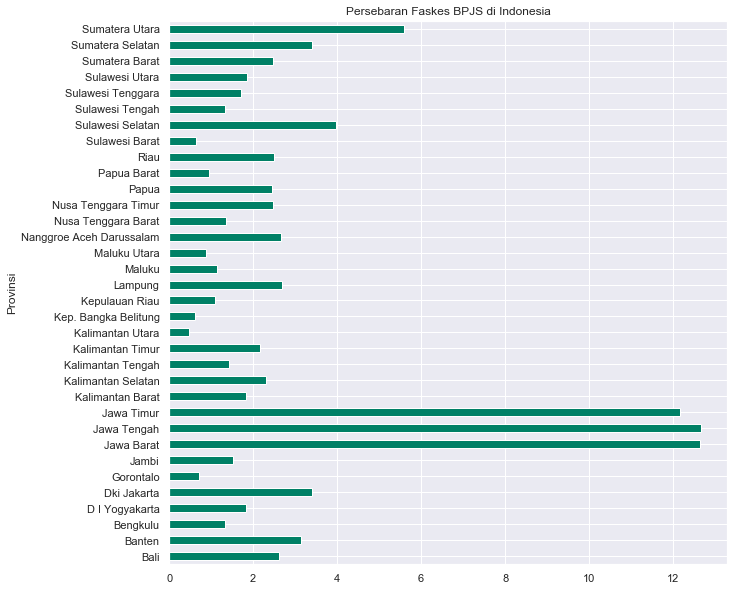

In [9]:
ax = prov_dist.plot(title="Persebaran Faskes BPJS di Indonesia" 
                    ,kind="barh", figsize=(10,10), colormap=plt.cm.get_cmap("summer"))
fig = ax.get_figure()
fig.savefig("BPJS.png")

### Central Java has 

### From the plot above, we can imply that the medical facilities disparity is occured in Indonesia. The goverment should consider in augmenting the quantities of medical facilities in other province as well as in Java.  